<a href="https://colab.research.google.com/github/9105507/Trabajo_Drones_2023_2024/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [1]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1
!pip install -q supervision==0.19.0rc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

Import Dependencies and Download Data

In [2]:
import cv2
import supervision as sv
import numpy as np

from tqdm import tqdm
!pip install --upgrade inference
from inference.models.yolo_world.yolo_world import YOLOWorld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.7/305.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: inference-cli
    Found existing installation: inference-cli 0.9.12rc1
    Uninstalling inference-cli-0.9.12rc1:
      Successfully uninstalled inference-cli-0.9.12rc1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.9.12rc1 requires inference-cli==0.9.12rc1, but you 

In [3]:
!wget -P {perro} -q https://media.roboflow.com/notebooks/examples/dog.jpeg
# !wget -P {caseta} -q https://github.com/9105507/Trabajo_Drones_2023_2024/blob/main/caseta.png
# !wget -P {torreeiffel} -q https://github.com/9105507/Trabajo_Drones_2023_2024/blob/main/torreeiffel.jpeg

In [4]:
SOURCE_IMAGE_PERRO = "/content/{perro}/dog.jpeg"
# SOURCE_IMAGE_CASETA = "/content/{caseta}/caseta.png"
SOURCE_IMAGE_TORRE = "/content/torreeiffel.jpeg"

Run the Model

In [5]:
#PERRO
model = YOLOWorld(model_id="yolo_world/l")

classes = ["person", "backpack", "dog", "eye", "nose", "ear", "tongue"]
model.set_classes(classes)

image = cv2.imread(SOURCE_IMAGE_PERRO)
results = model.infer(image)
detections = sv.Detections.from_inference(results)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.3MiB/s]


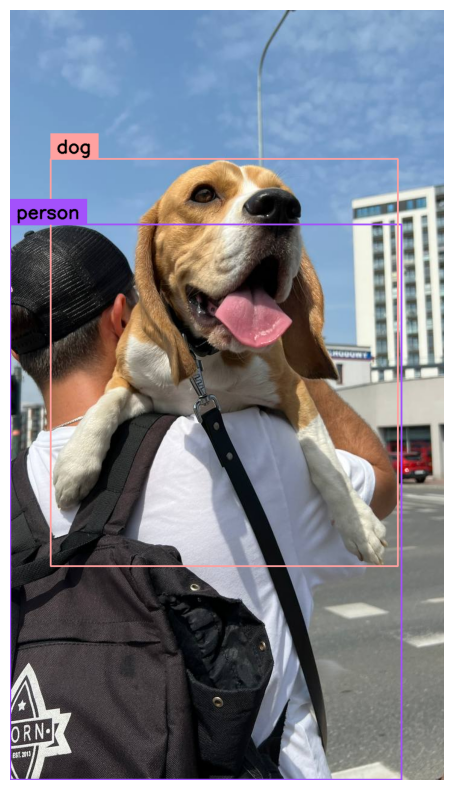

In [6]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

CON LA TORRE NO FUNCIONA

In [11]:
#TORRE
model = YOLOWorld(model_id="yolo_world/l")

classes = ["person", "backpack", "dog", "eye", "nose", "ear", "tongue"]
model.set_classes(classes)

image = cv2.imread(SOURCE_IMAGE_TORRE)
results = model.infer(image)
detections = sv.Detections.from_inference(results)

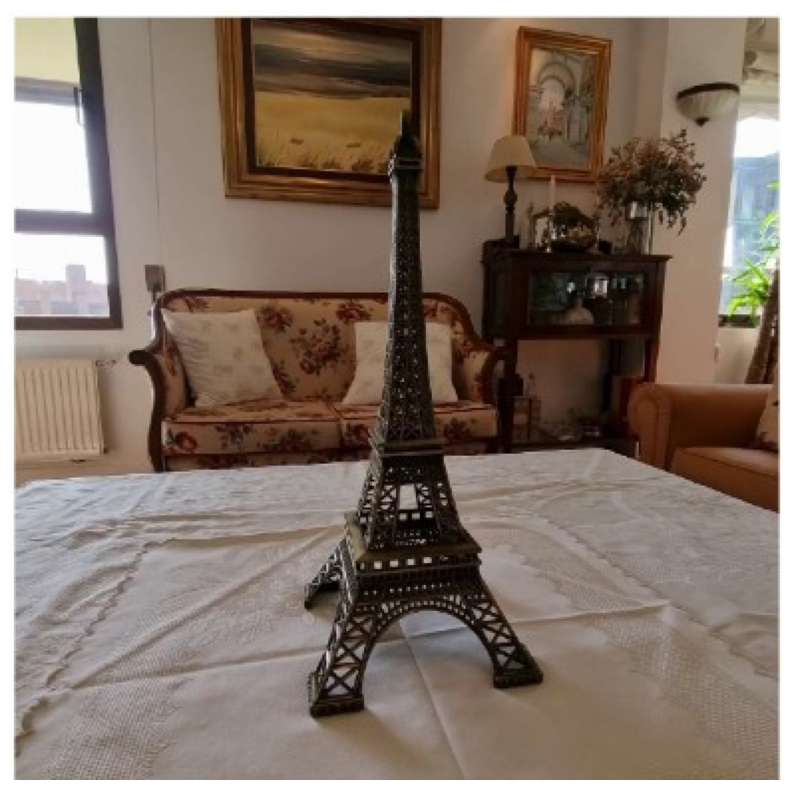

In [12]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

In [ ]:
# Instalar OpenCV
!pip install opencv-python

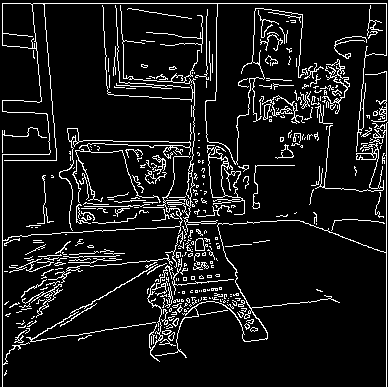

In [16]:
# Importar librerías
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Leer la imagen
imagen = cv2.imread("/content/torreeiffel.jpeg")

# Convertir a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar detector de bordes Canny
bordes = cv2.Canny(gris, 100, 200)

# Mostrar imagen con bordes
cv2_imshow(bordes)
cv2.waitKey(0)
cv2.destroyAllWindows()